In [1]:
using UMAP
using MLDatasets
using Plots
using BenchmarkTools
using PyCall
@pyimport umap
pyplot();

┌ Info: Recompiling stale cache file /home/dillon/.julia/compiled/v1.0/UMAP/VBM6H.ji for UMAP [bfa8c4a0-b777-11e8-1650-5d8029af211b]
└ @ Base loading.jl:1190


In [2]:
data = MNIST.convert2features(MNIST.traintensor(Float64))[:, 1:4000]
train_x = [data[:,i] for i in 1:size(data, 2)]
train_y = MNIST.trainlabels(1:size(data, 2));

In [3]:
UMAP_(train_x[1:100], 5); # precompile
@time umap_jl_struct = UMAP_(train_x, 10;min_dist=0.001, n_epochs=500)
res_jl = umap_jl_struct.embedding;

 17.052933 seconds (602.09 k allocations: 380.351 MiB, 0.90% gc time)


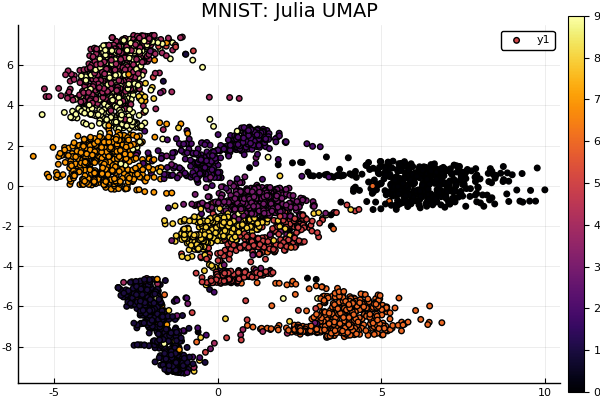

In [4]:
x2 = res_jl[1,:]
y2 = res_jl[2,:]
scatter(x2, y2, zcolor=train_y, title="MNIST: Julia UMAP")

In [5]:
@time res_py = umap.UMAP(n_neighbors=10, min_dist=0.001, metric="euclidean", n_epochs=500)[:fit_transform](permutedims(data));

 10.499171 seconds (611.40 k allocations: 55.120 MiB, 0.19% gc time)


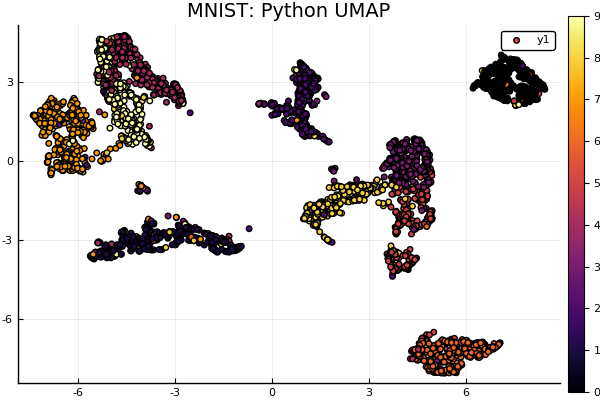

In [6]:
x = res_py[:,1]
y = res_py[:,2]
scatter(x, y, zcolor=train_y, title="MNIST: Python UMAP")